## Import Libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Load Data

In [4]:
df = pd.read_csv('athlete_events.csv')

# Look at the first 5 lines of the data to make sure it loaded correctly
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Exploring the Data

In [11]:
# Checking all the columns headers of the data
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

There are 15 columns in this dataset. The formatting is consistent so there's no need to change any of the column names.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [7]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


This tells us a lot of interesting things about this dataset. Some of the most interesting things include:
   * There was a 10 year old olympic athlete! 
   * As well as a 97 year old athlete!
   * The shortest athlete was just over 4'1'' and the tallest athlete was just over 7'4'' !
   * The lightest athlete was just over 55 lbs and the heaviest athlete was almost 472 lbs!

Before we analyze the dataset let's dive deeper into the interesting stats mentioned above.

In [17]:
# Who is this 10 year old olympic athlete?
df.loc[df['Age'] == 10]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
142882,71691,Dimitrios Loundras,M,10.0,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze


The 10 year old olympic athlete was Dimitrios Loundras, and he even won a bronze medal for his sport in gymnastics. I cross checked this information with these external sources and it checks out. Loundras was really an impressive 10 year old!
 * https://en.wikipedia.org/wiki/Dimitrios_Loundras
 * https://www.topendsports.com/events/summer/athletes/loundras-dimitrios.htm
 * https://olympics.com/en/athletes/dimitrios-loundras

In [18]:
# Who is this 97 year old olympic athlete?
df.loc[df['Age'] == 97]


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
257054,128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN


The 97 year old athlete was an American names John Quincy Adams Ward, in sculpturing and statues. I didn't know Art Competitions was a sport in the olympics so I investigated further. It turns out that Art Competitions were part of the olympics from 1912 to 1948, and were divided into 5 categories: architecture, literature, painting, sculpture, and music.
 * https://en.wikipedia.org/wiki/Art_competitions_at_the_Summer_Olympics

In [20]:
# Who were the shortest and tallest athletes?
df.loc[(df['Height'] == 127) | (df['Height'] == 226)]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
29333,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Individual All-Around,NaN
29334,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Team All-Around,NaN
29335,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Floor Exercise,NaN
29336,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Horse Vault,NaN
29337,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Uneven Bars,NaN
29338,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Balance Beam,NaN
164821,82769,Lyton Levison Mphande,M,25.0,127.0,62.0,Malawi,MAW,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Light-Welterweight,NaN
265040,132627,Yao Ming,M,20.0,226.0,141.0,China,CHN,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,NaN
265041,132627,Yao Ming,M,23.0,226.0,141.0,China,CHN,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,NaN
265042,132627,Yao Ming,M,27.0,226.0,141.0,China,CHN,2008 Summer,2008,Summer,Beijing,Basketball,Basketball Men's Basketball,NaN


It turns out that there were two athletes that were at a record low height of 127 cm. The first, Rosario Briones, was a 15 year old female who competed in gymnastics. The second, Lyton Levison Mphande, was a 25 year old male who competed in boxing. The tallest athlete was Yao Ming who competed in men's basketball in the 2000, 2004, and 2008 olympics. Something interesting is that the shortest and the tallest recorded athletes didn't win any medals. 

In [21]:
# Who were the lightest and heaviest athletes?
df.loc[(df['Weight'] == 25) | (df['Weight'] == 214)]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
23155,12177,"Ricardo Blas, Jr.",M,21.0,183.0,214.0,Guam,GUM,2008 Summer,2008,Summer,Beijing,Judo,Judo Men's Heavyweight,NaN
23156,12177,"Ricardo Blas, Jr.",M,25.0,183.0,214.0,Guam,GUM,2012 Summer,2012,Summer,London,Judo,Judo Men's Heavyweight,NaN
40849,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Individual All-Around,NaN
40850,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Team All-Around,NaN
40851,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Floor Exercise,NaN
40852,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Horse Vault,NaN
40853,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Uneven Bars,NaN
40854,21049,Choi Myong-Hui,F,14.0,135.0,25.0,North Korea,PRK,1980 Summer,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Balance Beam,NaN


The heaviest athlete to participate, Ricardo Blas Jr, competed in men's judo for the 2008 and 2012 olympics. Intersting to see that he weighed in at the exact same weight four years apart. The lightest athlete to participate, Choi Myong-Hui, competed in women's gymnastics in six events. Another interesting discovery was that the heaviest and lightest athletes to complete didn't win any medals either.  

## Data Cleansing

In [5]:
# Checking whick columns have null values
nan_values = df.isnull()
nan_columns = nan_values.any()
nan_columns

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
dtype: bool

Looks like four columns have null values.
 * Age, Height, and Weight null values will have to be dropped when we do any analysis with these numbers.
 * Medal column makes sense because only some of the olympic athletes would have won in their events.

In [8]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

This shows the number of null values for each column. Since there is not that many null values for Age, Height, and Weight dropping them for certain analyses won't skew the results. 

## Analyzing the Data

#### Medals per Country

In [151]:
# Create a new df that only contains the winners
winners_df = df[(df['Medal'] == 'Gold') | (df['Medal'] == 'Silver') | (df['Medal'] == 'Bronze')]

# I was getting an error for trying to set a value to a slice of a dataframe during the groupby() function in the next cell. So I needed to
# save the winners into a new csv and load that csv to fix this error.
winners_df.to_csv('olympic_winners.csv', index=False)

winners_df = pd.read_csv('olympic_winners.csv')

winners_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
2,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
3,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
4,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [48]:
winners_df['count'] = 1
winners_df.groupby(['NOC', 'Medal']).count()['count']

NOC  Medal 
AFG  Bronze     2
AHO  Silver     1
ALG  Bronze     8
     Gold       5
     Silver     4
               ..
ZAM  Bronze     1
     Silver     1
ZIM  Bronze     1
     Gold      17
     Silver     4
Name: count, Length: 362, dtype: int64

Each row in the new dataframe is grouped by the country first then the type of medal. I also wanted to know the count of each medal won by country which is the third column in the list.

Now, let's visualize this data.

In [62]:
# What are the top 10 most winningest countries?
top_10 = winners_df.groupby(['NOC']).count()['count'].sort_values(ascending = False).head(10)
top_10

NOC
USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
ITA    1637
SWE    1536
CAN    1352
AUS    1320
RUS    1165
Name: count, dtype: int64

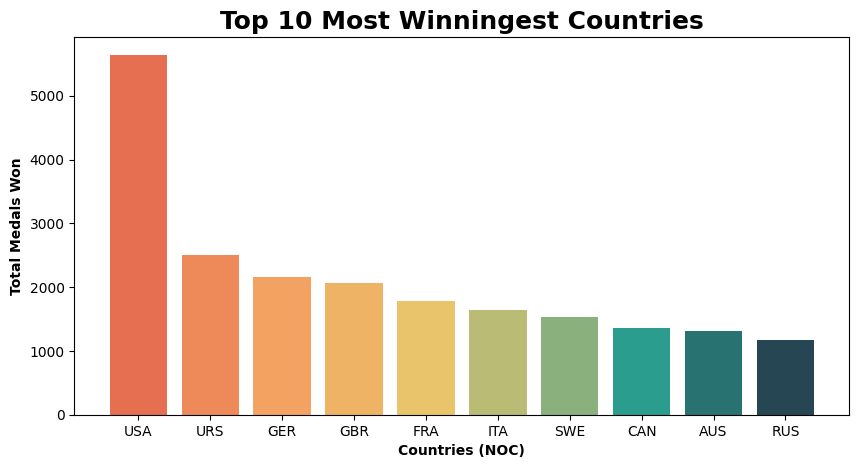

In [81]:
labels = ['USA', 'URS', 'GER', 'GBR', 'FRA', 'ITA', 'SWE', 'CAN', 'AUS', 'RUS']
values = [5637, 2503, 2165, 2068, 1777, 1637, 1536, 1352, 1320, 1165]

plt.figure(figsize=(10,5), dpi=100)

bars = plt.bar(labels, values, color=['#E76F51', '#EE8959', '#F4A261', '#EFB366', '#E9C46A', '#BABB74', '#8AB17D', '#2A9D8F', '#287271', '#264653'])

plt.xlabel('Countries (NOC)', fontdict={'fontweight': 'bold'})
plt.ylabel('Total Medals Won', fontdict={'fontweight': 'bold'})
plt.title('Top 10 Most Winningest Countries', fontdict={'fontweight': 'bold', 'fontsize': 18})

plt.show()

The USA is very dominant in the olympics. They have more than double the amount of medals as the next best country. 

#### Distribution of Medals by Age

In [130]:
# Let's remove all the null Age values 
age_df = winners_df.dropna(subset=['Age'])
age_df.head()
age_df.isnull().sum()

ID           0
Name         0
Sex          0
Age          0
Height    8002
Weight    8626
Team         0
NOC          0
Games        0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal        0
count        0
dtype: int64

Now all the rows that had a null value for age are removed so we can continue with the distribution of medals by age analysis.

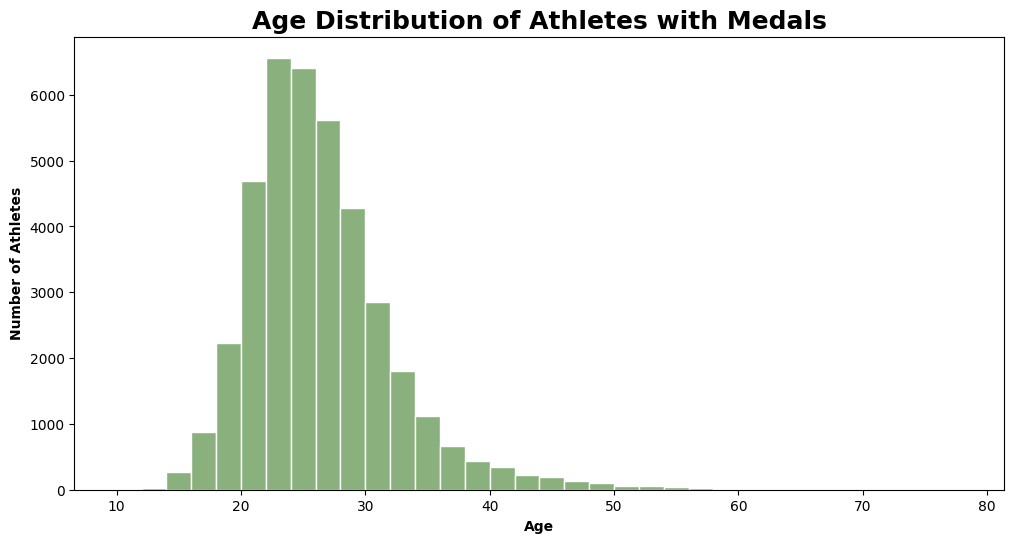

In [129]:
plt.figure(figsize=(12,6), dpi=100)

plt.hist(age_df.Age, bins=np.arange(10,80,2), color='#8AB17D', edgecolor='white')

plt.title('Age Distribution of Athletes with Medals', fontdict={'fontweight': 'bold', 'fontsize': 18})
plt.xlabel('Age', fontdict={'fontweight': 'bold'})
plt.ylabel('Number of Athletes', fontdict={'fontweight': 'bold'})

plt.show()

Looks like the majority of medal winners are in the age range of 20 to 30 years old. 

#### Height vs Weight of Athletes

In [144]:
# Let's remove all the null Height and Weight values
wh_df = winners_df.dropna(subset=['Weight', 'Height'])
wh_df.head()
wh_df.isnull().sum()

ID         0
Name       0
Sex        0
Age       15
Height     0
Weight     0
Team       0
NOC        0
Games      0
Year       0
Season     0
City       0
Sport      0
Event      0
Medal      0
count      0
dtype: int64

Perfect. Now all the rows with null values for height and weight are dropped.

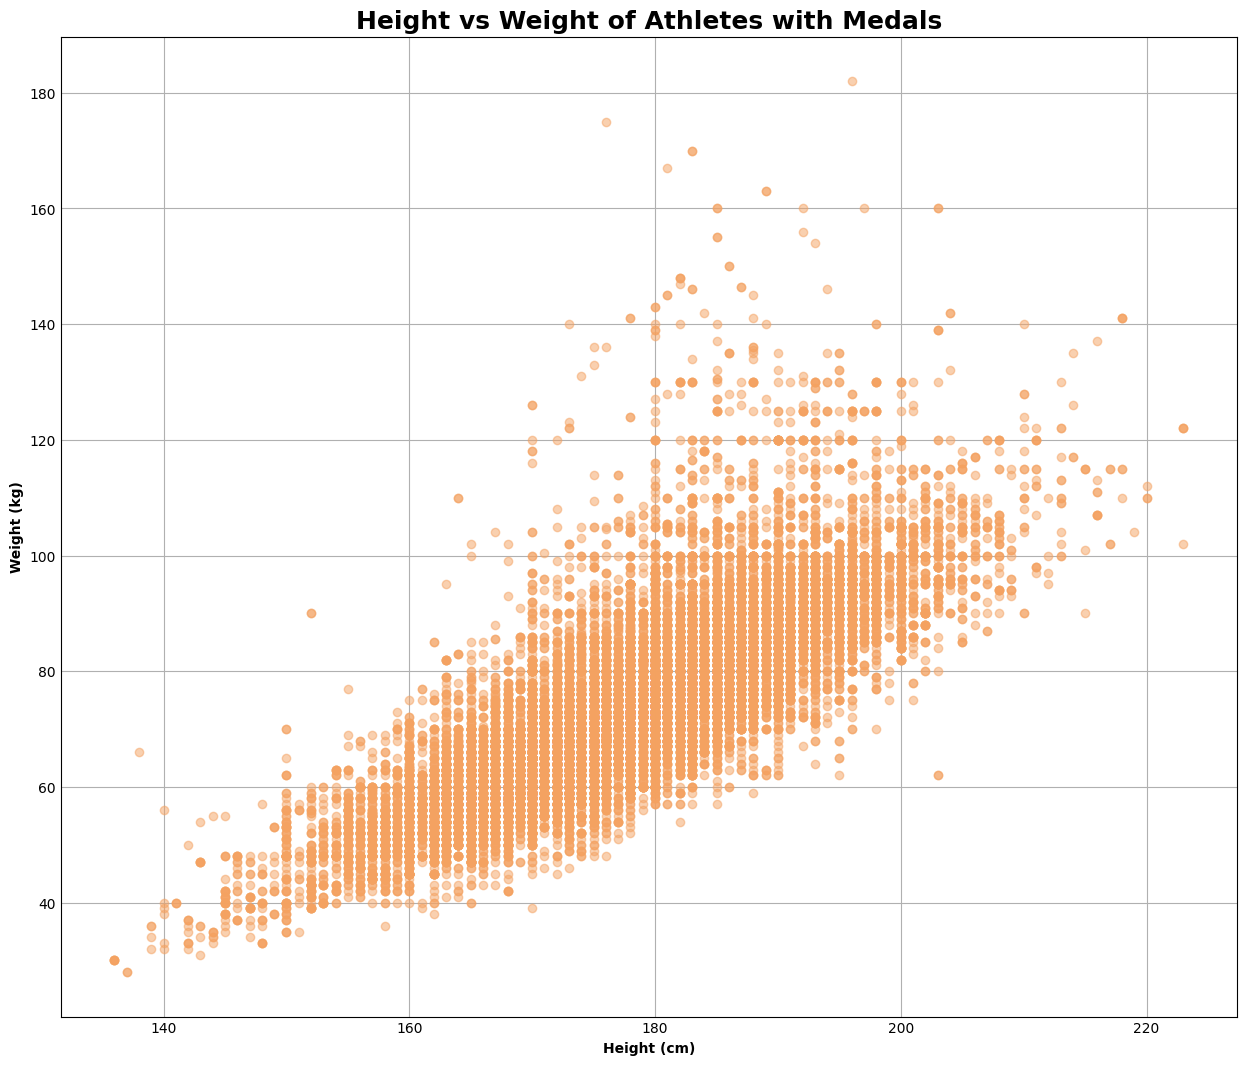

In [146]:
plt.figure(figsize=(12,10), dpi=100)

plt.scatter(wh_df.Height, wh_df.Weight, color='#F4A261', alpha=0.5)

plt.xlabel("Height (cm)", fontdict={'fontweight': 'bold'})
plt.ylabel('Weight (kg)', fontdict={'fontweight': 'bold'})
plt.title('Height vs Weight of Athletes with Medals', fontdict={'fontweight': 'bold', 'fontsize': 18})

plt.show()

There seems to be a positive correlation between height and weight for athletes that have won medals. 

There are also some outliers with weight and height. Let's dive a little deeper into these areas.

In [149]:
wh_df.loc[(wh_df['Weight'] > 160) & (wh_df['Height'] < 200)]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,count
5349,20144,Andrey Ivanovich Chemerkin,M,24.0,183.0,170.0,Russia,RUS,1996 Summer,1996,Summer,Atlanta,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold,1
5350,20144,Andrey Ivanovich Chemerkin,M,28.0,183.0,170.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Weightlifting,Weightlifting Men's Super-Heavyweight,Bronze,1
17967,62843,Olha Vasylivna Korobka,F,22.0,181.0,167.0,Ukraine,UKR,2008 Summer,2008,Summer,Beijing,Weightlifting,Weightlifting Women's Super-Heavyweight,Silver,1
25138,87041,Dmitry Yuryevich Nosov,M,24.0,176.0,175.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Half-Middleweight,Bronze,1
34482,118869,"Christopher J. ""Chris"" Taylor",M,22.0,196.0,182.0,United States,USA,1972 Summer,1972,Summer,Munich,Wrestling,"Wrestling Men's Super-Heavyweight, Freestyle",Bronze,1
39398,134407,Leonid Ivanovych Zhabotynskiy,M,26.0,189.0,163.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Weightlifting,Weightlifting Men's Heavyweight,Gold,1
39399,134407,Leonid Ivanovych Zhabotynskiy,M,30.0,189.0,163.0,Soviet Union,URS,1968 Summer,1968,Summer,Mexico City,Weightlifting,Weightlifting Men's Heavyweight,Gold,1


Weightlifting, Judo and Wrestling are the outliers for Weight. This makes sense because more weight would give them an advantage against their competition.

In [150]:
wh_df.loc[(wh_df['Height'] > 220) & (wh_df['Weight'] < 130)]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,count
4463,16639,Tommy Loren Burleson,M,20.0,223.0,102.0,United States,USA,1972 Summer,1972,Summer,Munich,Basketball,Basketball Men's Basketball,Silver,1
30053,104059,Arvydas Romas Sabonis,M,23.0,223.0,122.0,Soviet Union,URS,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold,1
30054,104059,Arvydas Romas Sabonis,M,27.0,223.0,122.0,Lithuania,LTU,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Bronze,1
30055,104059,Arvydas Romas Sabonis,M,31.0,223.0,122.0,Lithuania,LTU,1996 Summer,1996,Summer,Atlanta,Basketball,Basketball Men's Basketball,Bronze,1


The outliers for Height are both basketball players. I'm guessing that they must have played center. Let's check this out with external sources.

My guess was correct. Both players played center in basketball. Here are the sources used:

 * https://en.wikipedia.org/wiki/Tommy_Burleson
 * https://en.wikipedia.org/wiki/Arvydas_Sabonis

#### Women in the Olympics

In [175]:
# Let's create a new dataframe filtering out all the male athletes. Also, let's only look at the Summer Olympics
women_df = df[(df['Sex'] == 'F') & (df['Season'] == 'Summer')]
women_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold


Looks good, all the male athletes have been removed so now we can focus on analyzing the female athletes.

In [160]:
# women_df['Count'] = 1
# women_df.groupby(['Year']).count()['Count']
# "A value is trying to be set on a copy of a slice from a DataFrame.Try using .loc[row_indexer,col_indexer] = value instead"

These two lines of code are giving me the same error as when I tried to group by the number of medals.

The fix is quite simple. I need to save this dataframe as a new csv file and try again.

In [173]:
women_df.to_csv('women_in_olympics.csv', index=False)

women_df = pd.read_csv('women_in_olympics.csv')

women_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
1,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN
2,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN
3,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN
4,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold


Now let's try to run thoes two lines of code.

In [174]:
women_df['Count'] = 1
women_df.groupby(['Year']).count()['Count']

Year
1900      33
1904      16
1906      11
1908      47
1912      87
1920     134
1924     244
1928     404
1932     347
1936     468
1948     628
1952    1497
1956     893
1960    1435
1964    1348
1968    1777
1972    2193
1976    2172
1980    1756
1984    2447
1988    3543
1992    4124
1996    5008
2000    5431
2004    5546
2008    5816
2012    5815
2016    6223
Name: Count, dtype: int64

Perfect! It worked out just like earlier. Now we can continue with the vizualization.

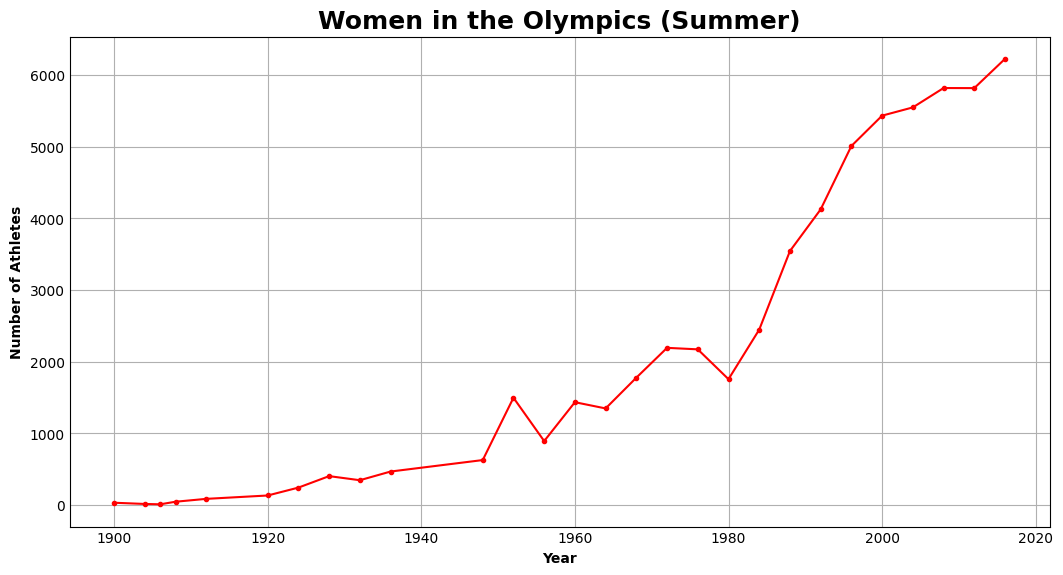

In [196]:
labels = [1900,1904,1906,1908,1912,1920,1924,1928,1932,1936,1948,1952,1956,1960,1964,1968,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016]
values = [33,16,11,47,87,134,244,404,347,468,628,1497,893,1435,1348,1777,2193,2172,1756,2447,3543,4124,5008,5431,5546,5816,5815,6223]

plt.figure(figsize=(10,5), dpi=100)

plt.plot(labels,values, 'r.-')


plt.xlabel('Year', fontdict={'fontweight': 'bold'})
plt.ylabel('Number of Athletes', fontdict={'fontweight': 'bold'})
plt.title('Women in the Olympics (Summer)', fontdict={'fontweight': 'bold', 'fontsize': 18})

plt.show()

The number of women that have participated in the summer olympics is steadily increasing. Since the 1980 summer olympics the number of women who competed has increased more than ever before.

## Conclusion

Exploring, analyzing, and visualizing the data for the olympics (1896-2016) was really fun! I learned so many interesting details from medals won per country to the rise of women in the olympics. I hope you enjoyed my analysis process, and I am constantly trying to improve so any feedback would be much appreciated!